In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [273]:
# read the data
df = pd.read_csv(r'C:\MLOps Projects\End to end MLOps Project HOTEL RESERVATIONS PREDICTION\notebooks\Hotel Reservations.csv')

df.head(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


In [274]:
# check duplicates
df.duplicated().sum()

0

In [275]:
# check missing values
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [276]:
# check the data types
df.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [277]:
# drop the Booking_ID column
df.drop('Booking_ID', axis=1, inplace=True)

In [278]:
df.shape

(36275, 18)

In [279]:
# check the unique values in each column
df.nunique()

no_of_adults                               5
no_of_children                             6
no_of_weekend_nights                       8
no_of_week_nights                         18
type_of_meal_plan                          4
required_car_parking_space                 2
room_type_reserved                         7
lead_time                                352
arrival_year                               2
arrival_month                             12
arrival_date                              31
market_segment_type                        5
repeated_guest                             2
no_of_previous_cancellations               9
no_of_previous_bookings_not_canceled      59
avg_price_per_room                      3930
no_of_special_requests                     6
booking_status                             2
dtype: int64

In [280]:
# check the value counts for each column
for col in df.columns:
    print(df[col].value_counts())
    print('-'*40)

no_of_adults
2    26108
1     7695
3     2317
0      139
4       16
Name: count, dtype: int64
----------------------------------------
no_of_children
0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: count, dtype: int64
----------------------------------------
no_of_weekend_nights
0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: count, dtype: int64
----------------------------------------
no_of_week_nights
2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: count, dtype: int64
----------------------------------------
type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64
----------------------------------------
required_car_parking_space
0    35151
1     1124
Name: count,

In [281]:
# our data is imbalanced
# we will use the SMOTE technique to balance the data

In [282]:
# select all numerical columns and categorical columns separately
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes('object').columns.tolist()

In [283]:
data = df.copy()

In [284]:
data.shape

(36275, 18)

### Univariate Analysis

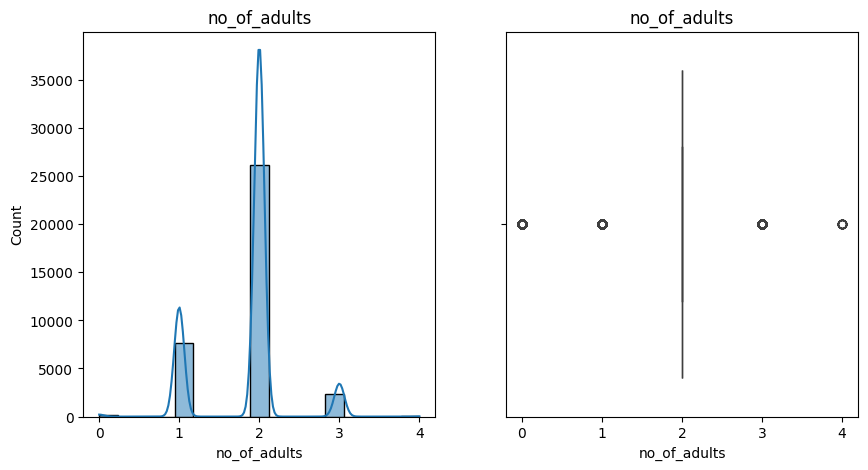

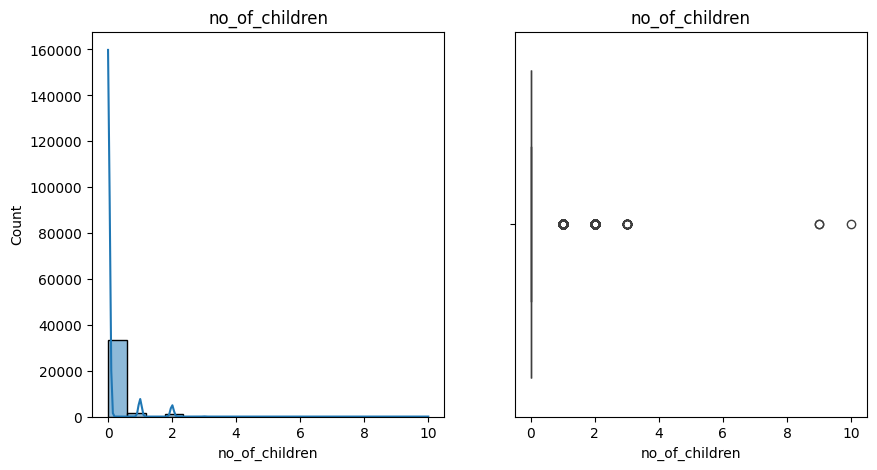

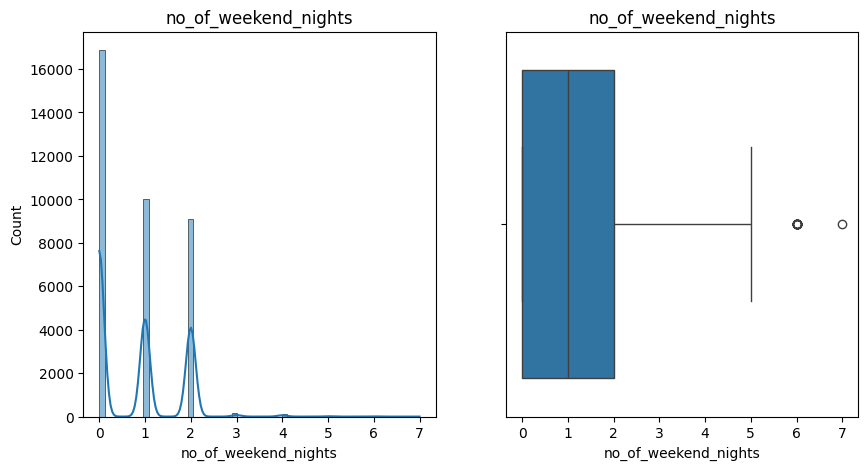

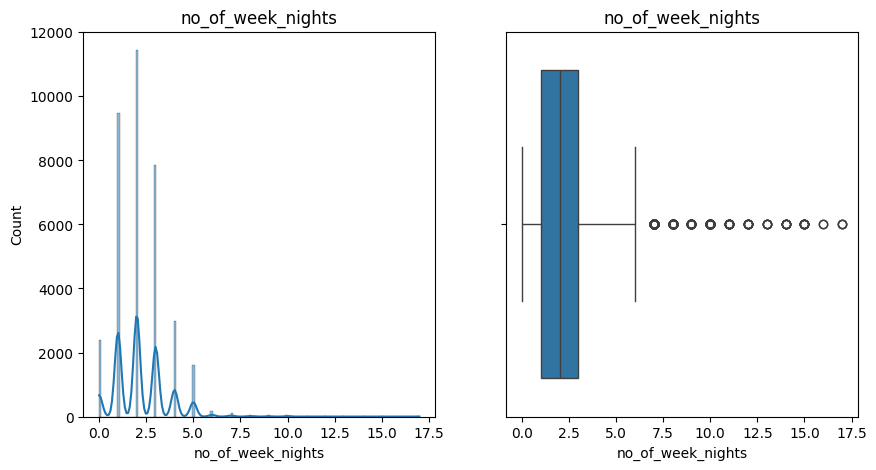

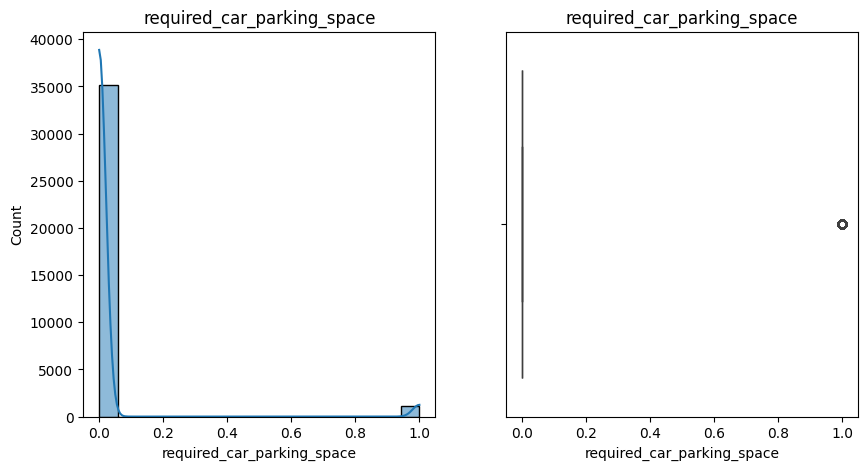

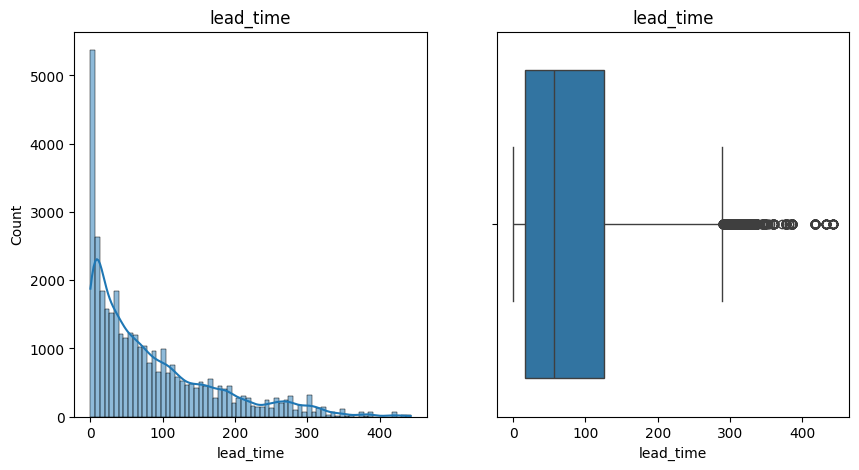

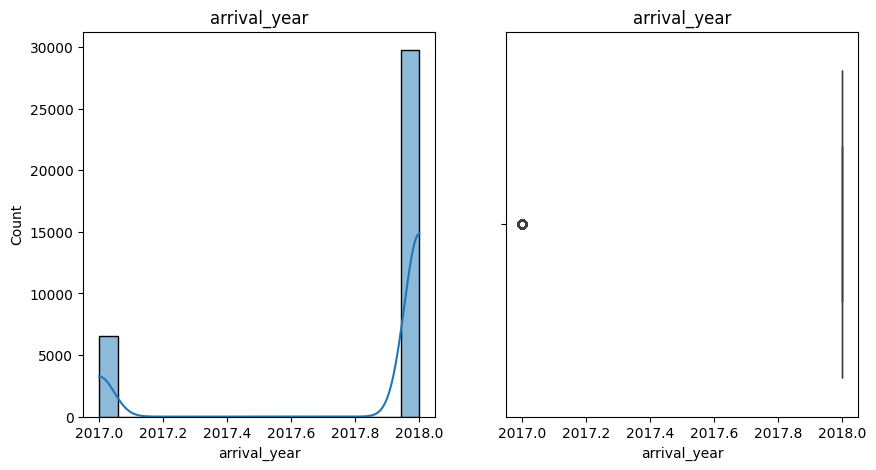

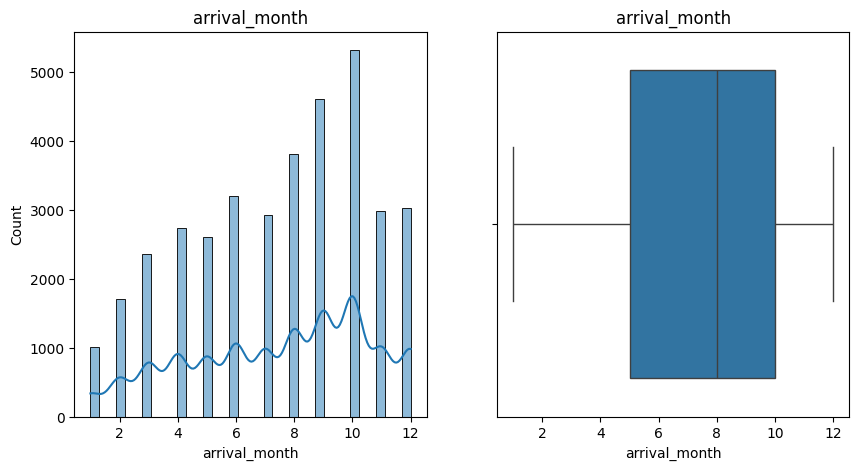

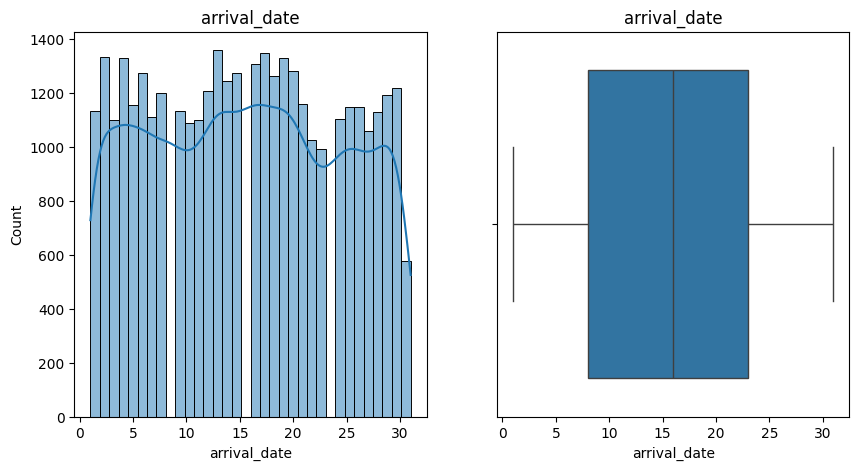

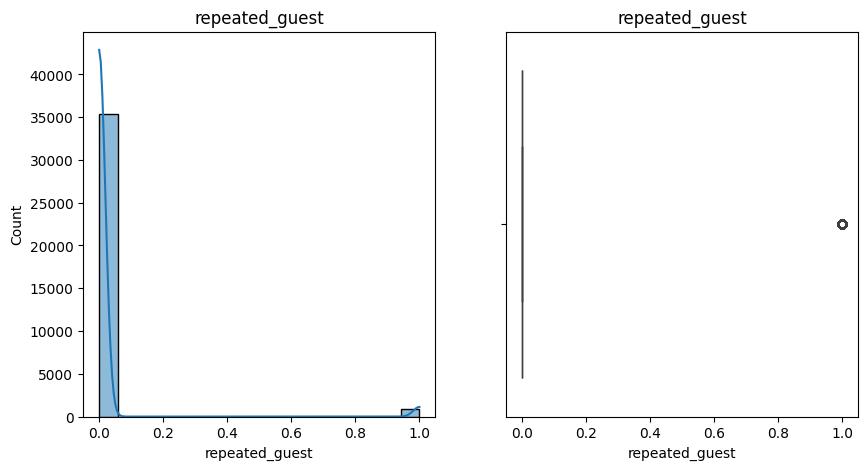

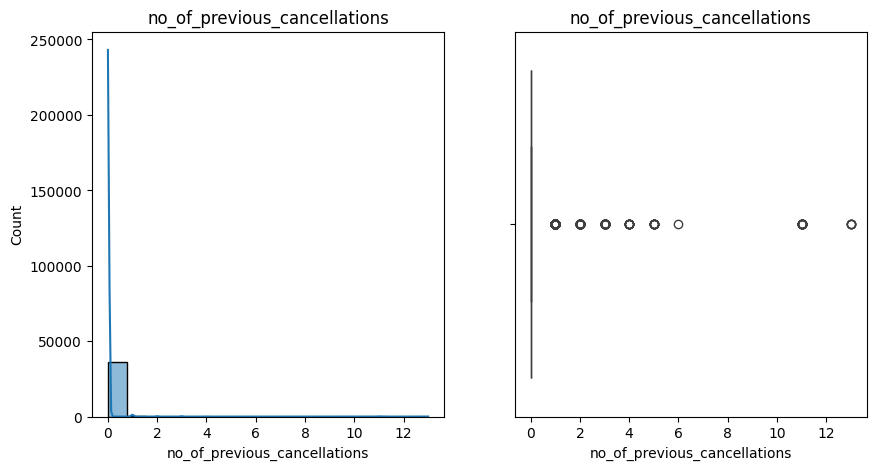

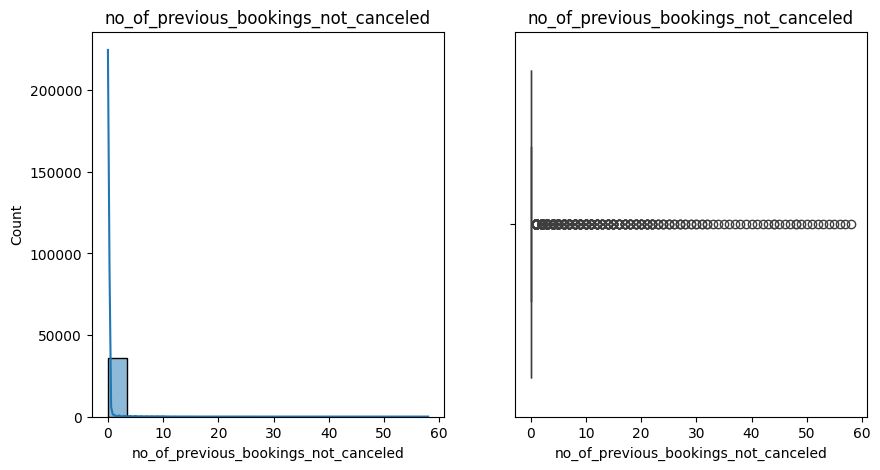

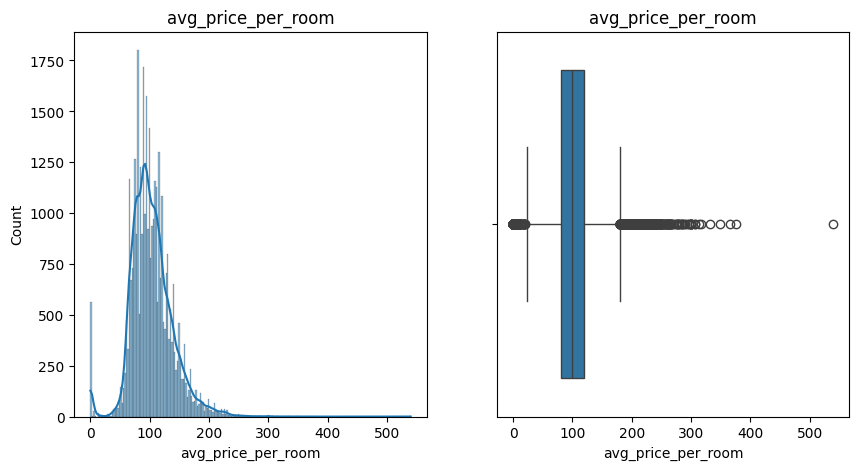

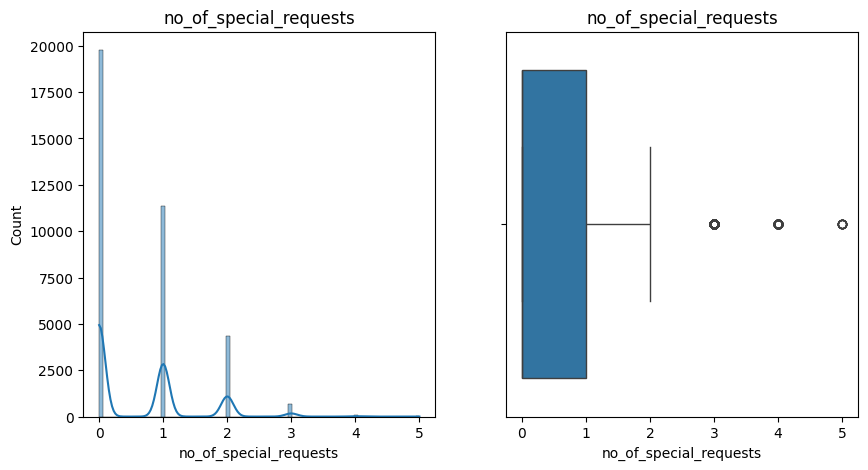

In [285]:
# print histogram and boxplot for the numerical columns side by side with kde true
for col in num_cols:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

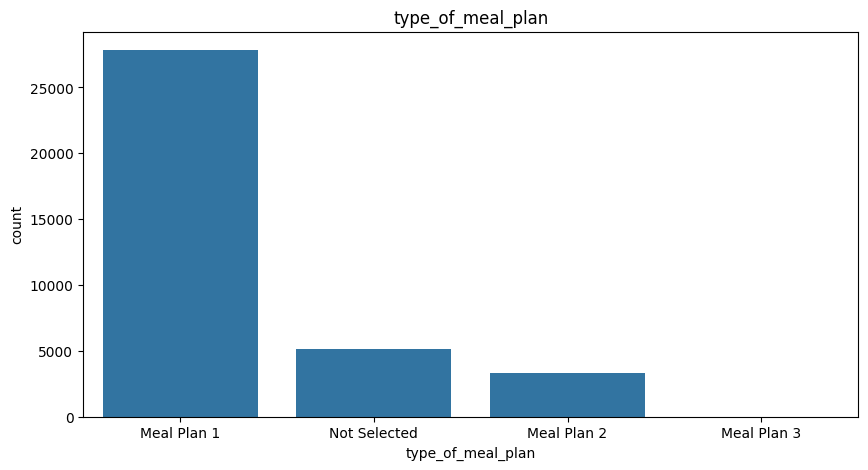

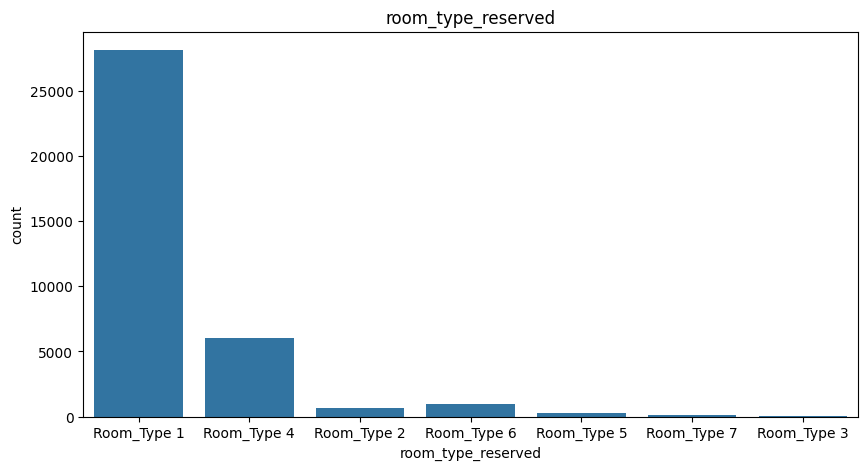

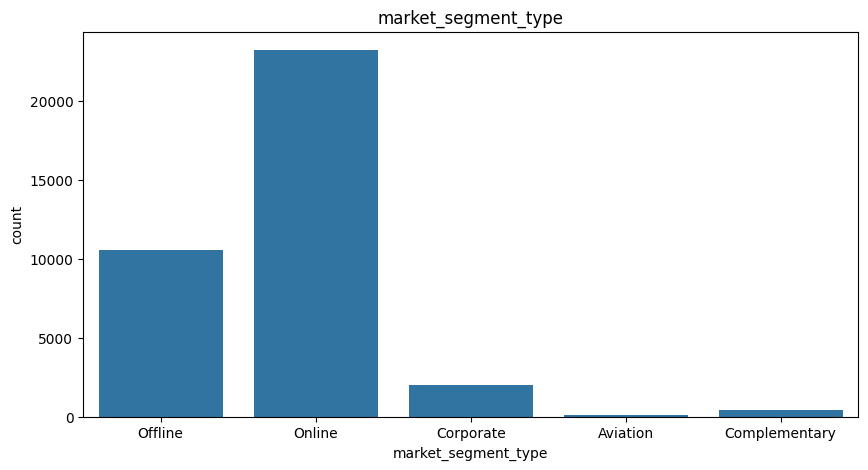

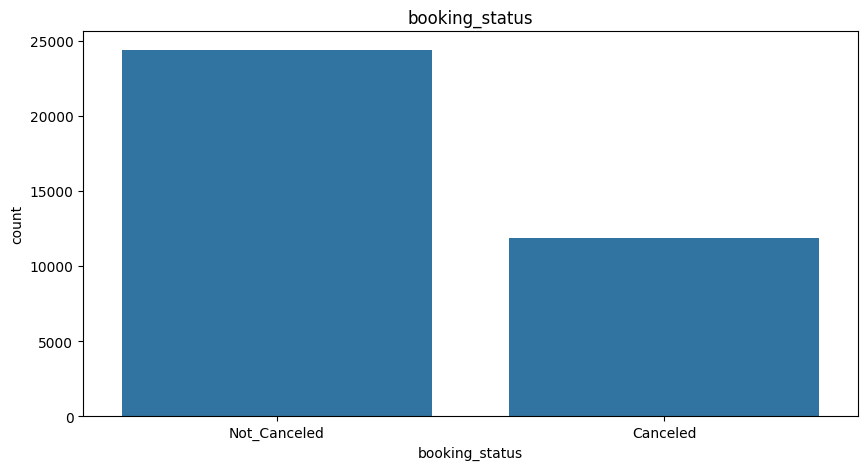

In [286]:
# print bar plot for the categorical columns
for col in cat_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, data=df)
    plt.title(col)
    plt.show()

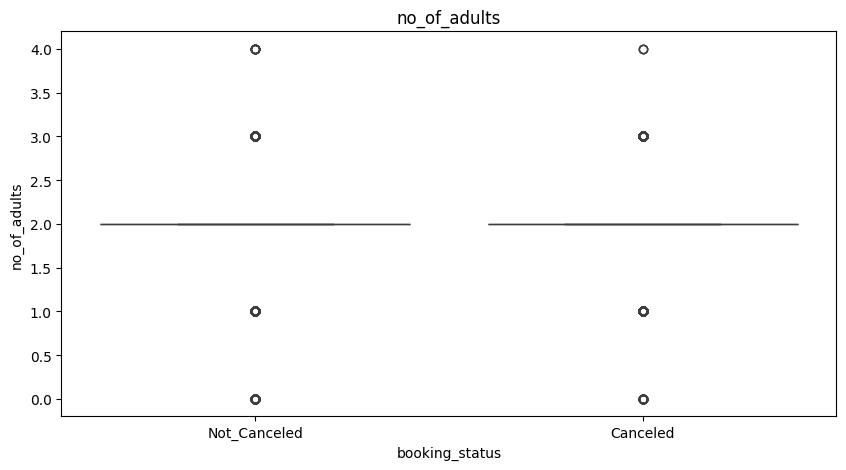

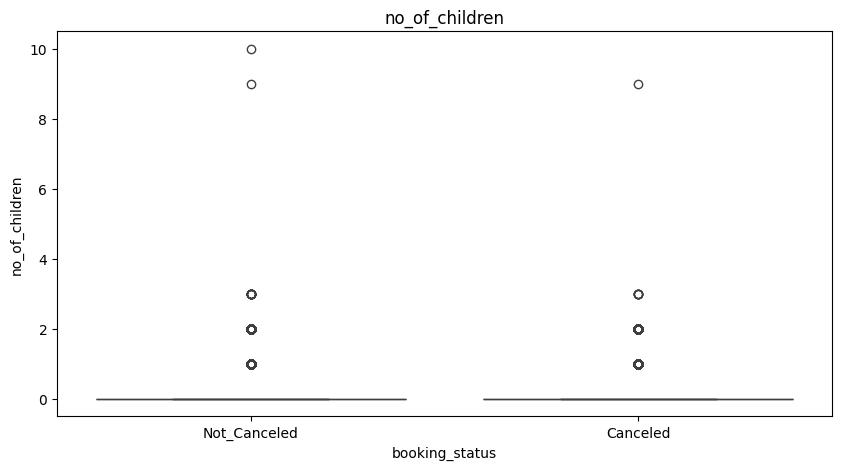

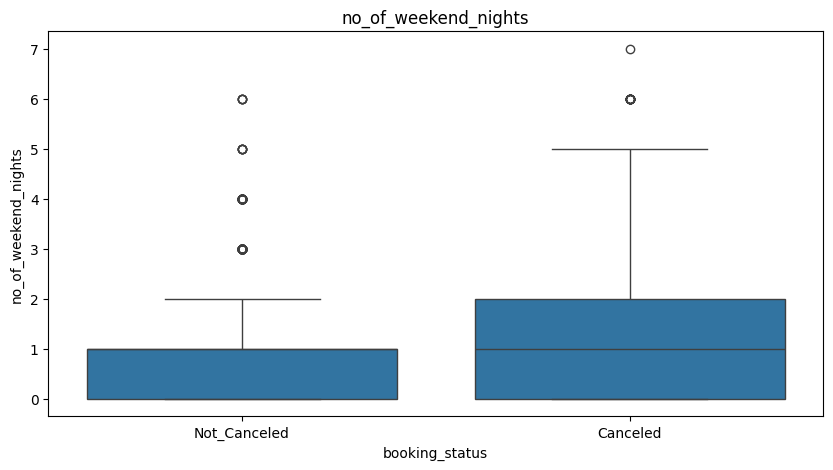

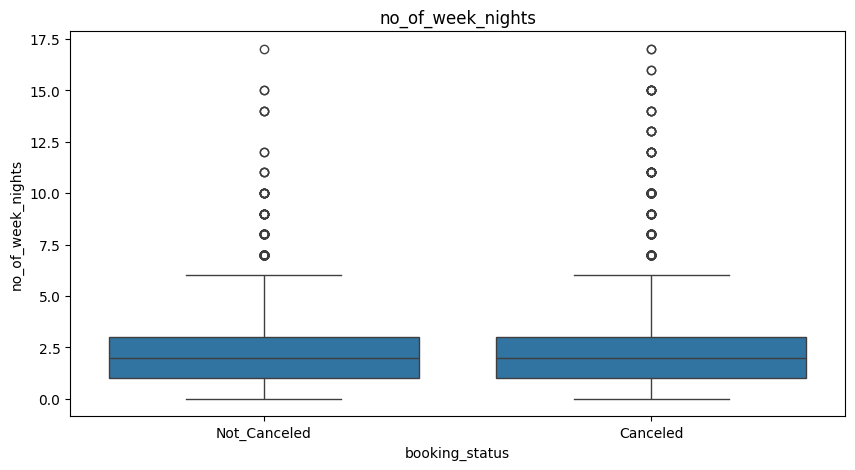

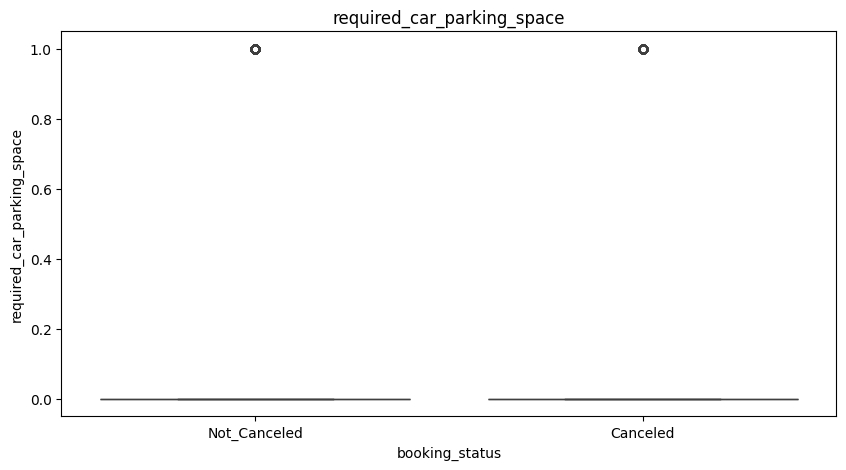

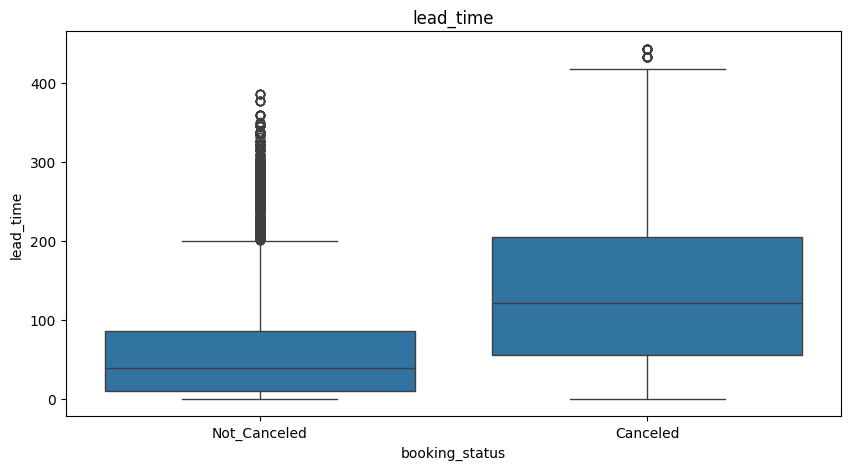

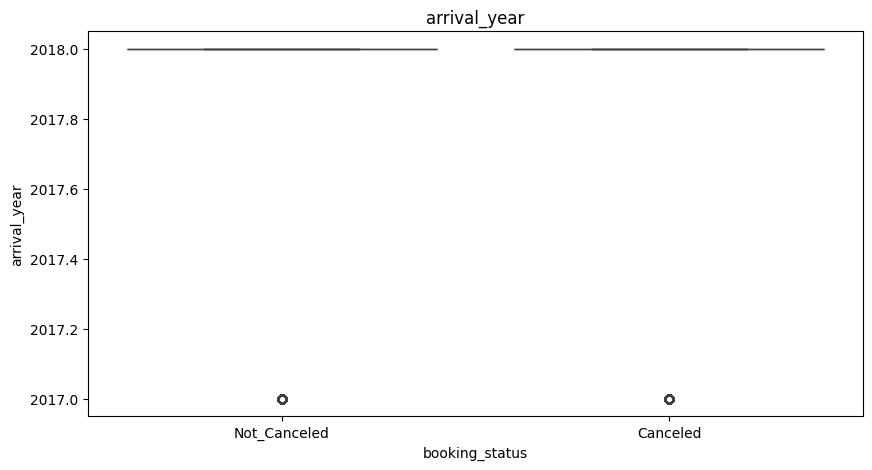

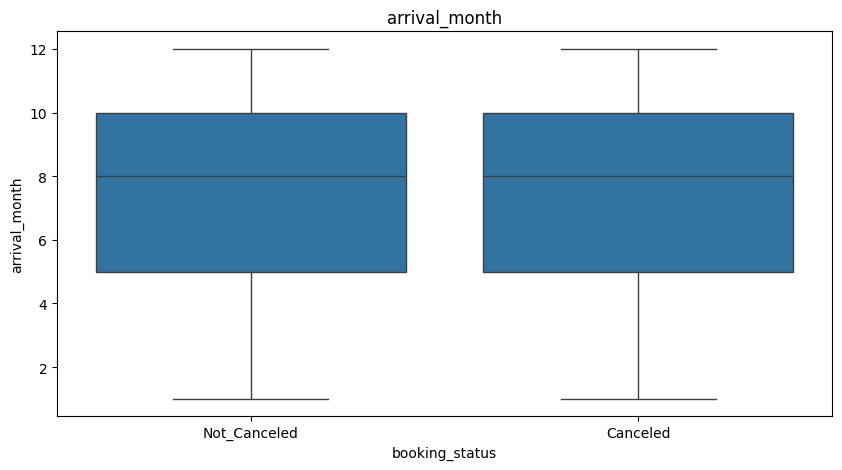

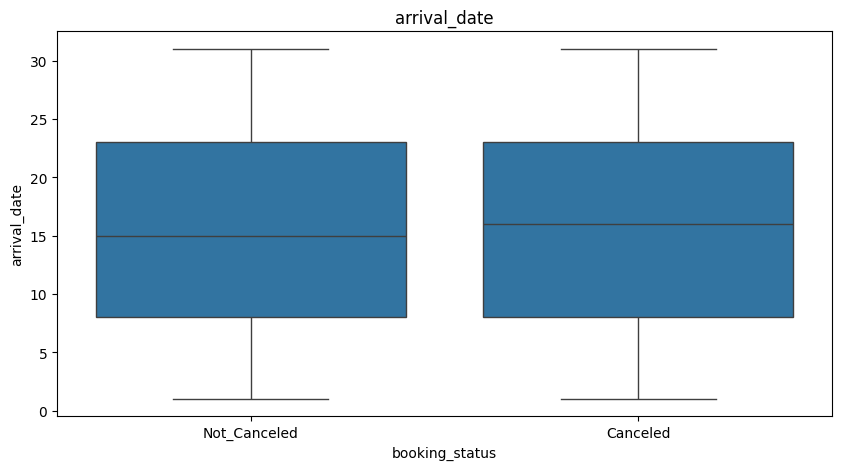

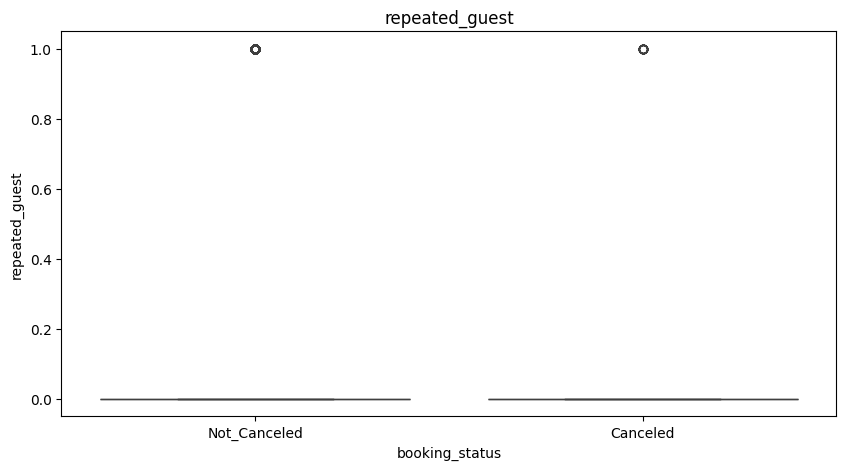

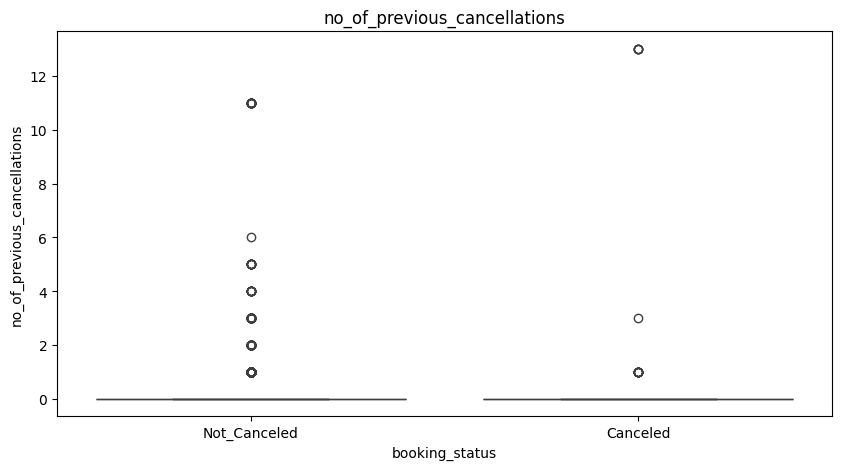

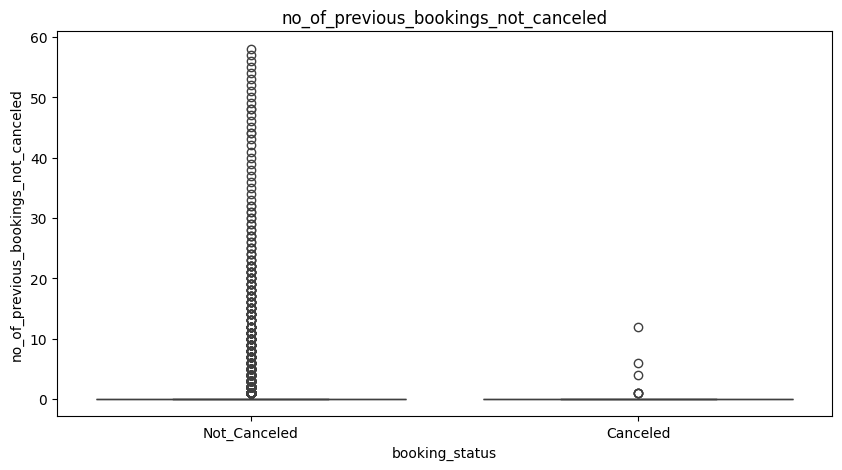

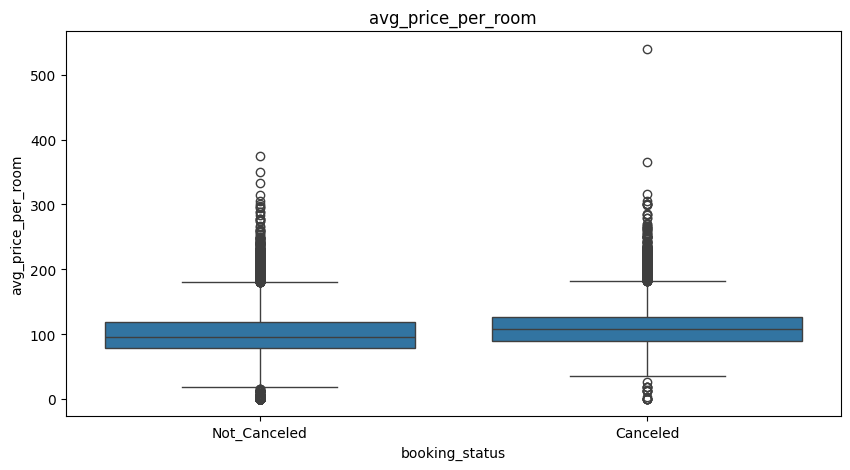

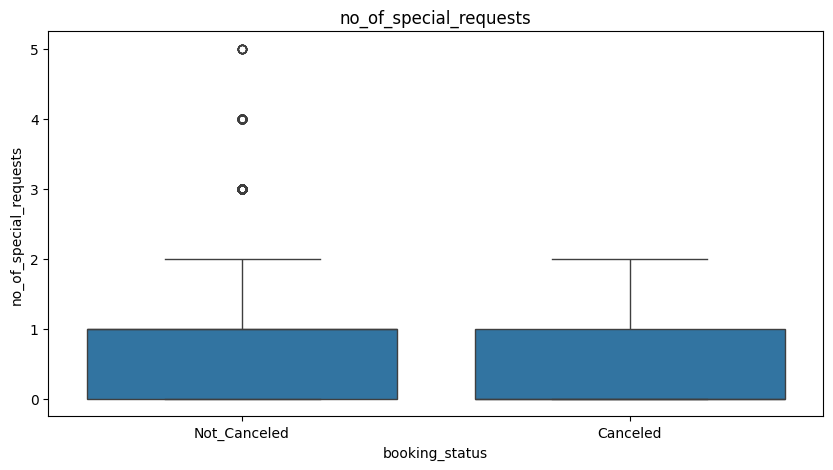

In [287]:
# Bi-variate analysis with respect to the target column of all numerical columns using boxplot

for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='booking_status', y=col, data=df)
    plt.title(col)
    plt.show()

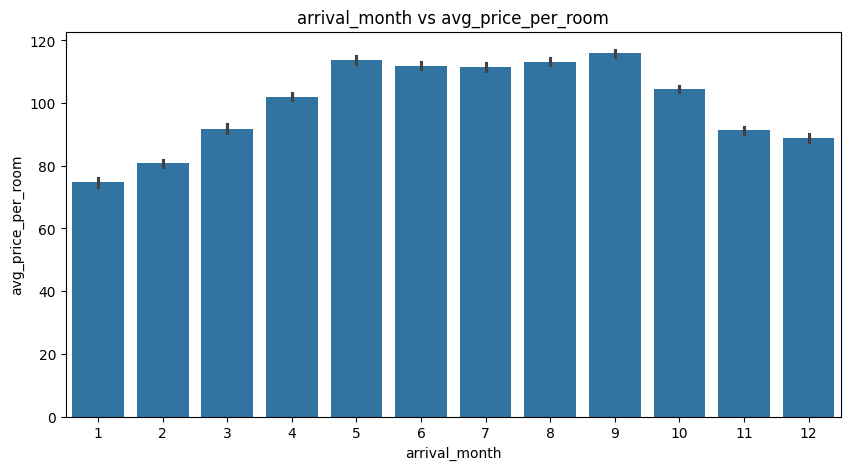

In [288]:
# plot bar plot betweem arrival_month and avg_price_per_room
plt.figure(figsize=(10, 5))
sns.barplot(x='arrival_month', y='avg_price_per_room', data=df)
plt.title('arrival_month vs avg_price_per_room')
plt.show()

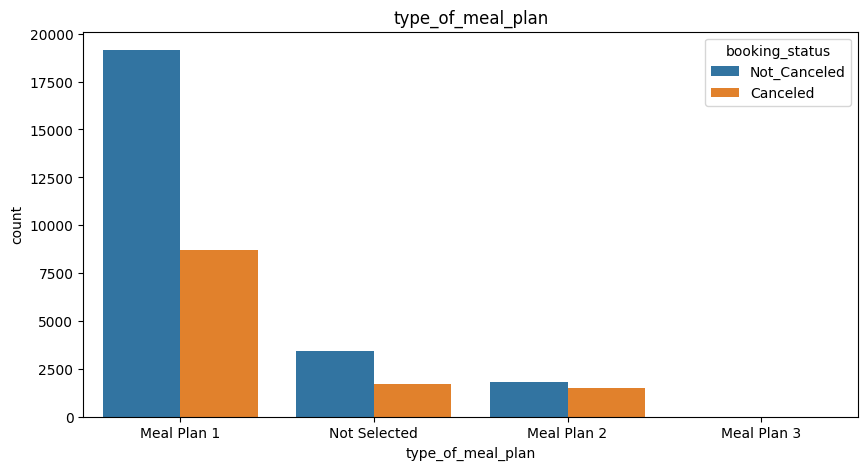

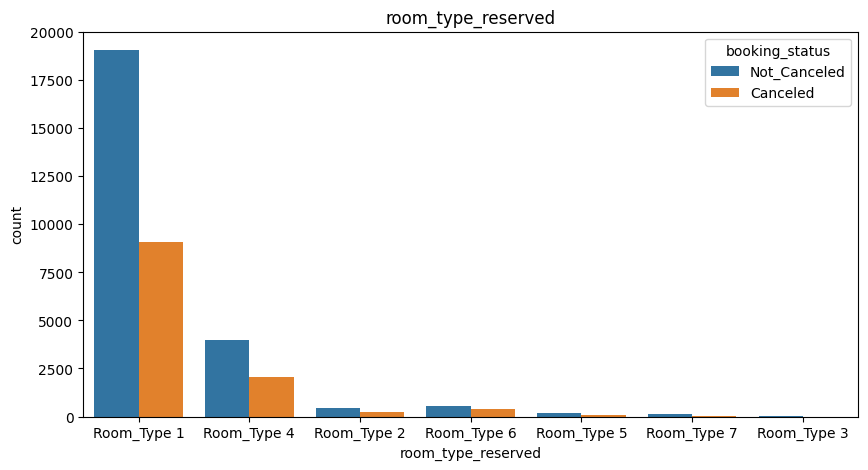

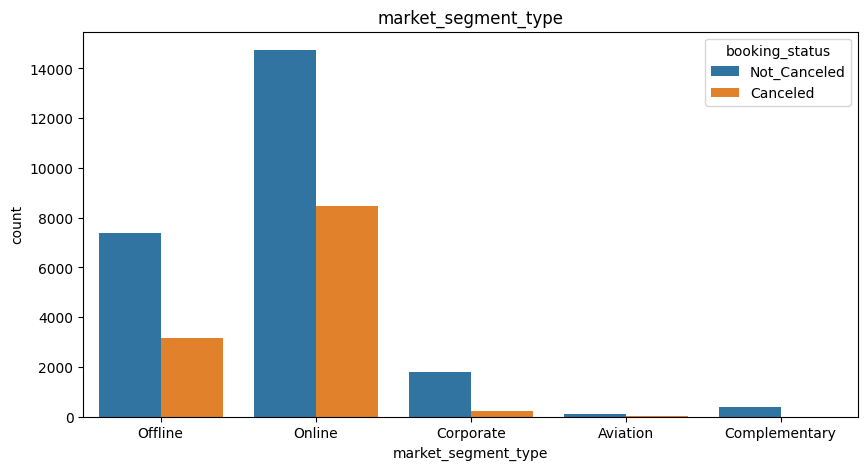

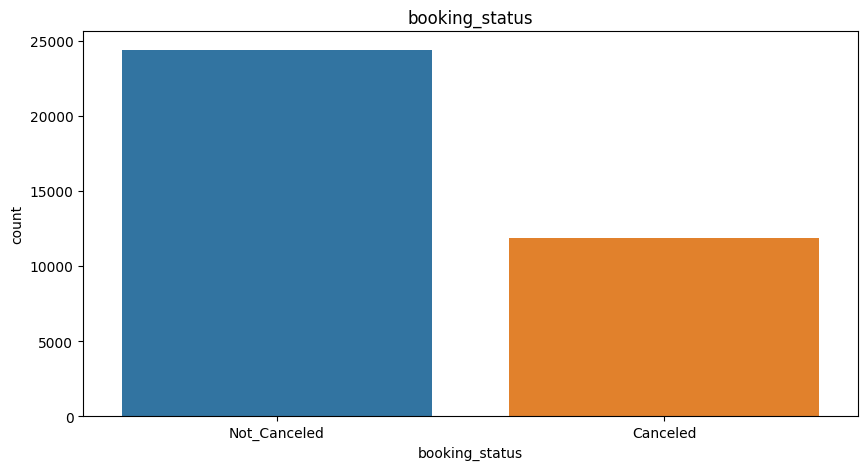

In [289]:
# plot bar plot betweem categorical columns and target column with countplot and stacked bar plot
for col in cat_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, hue='booking_status', data=df)
    plt.title(col)
    plt.show()

In [290]:
def plot_bivaraite_cat(df , target , cat_features):

    num_features = len(cat_features)
    num_rows = (num_features+1)//2

    fig , axes = plt.subplots(num_rows , 2 , figsize=(15 , num_rows*5))
    axes = axes.flatten()

    for i,feature in enumerate(cat_features):
        sns.countplot(x=feature , hue=target ,data=df , palette="Set2" , ax = axes[i])
        axes[i].set_title(f"{feature} VS {target}")
        axes[i].tick_params(axis='x' , rotation=90)

    plt.tight_layout()
    plt.show()

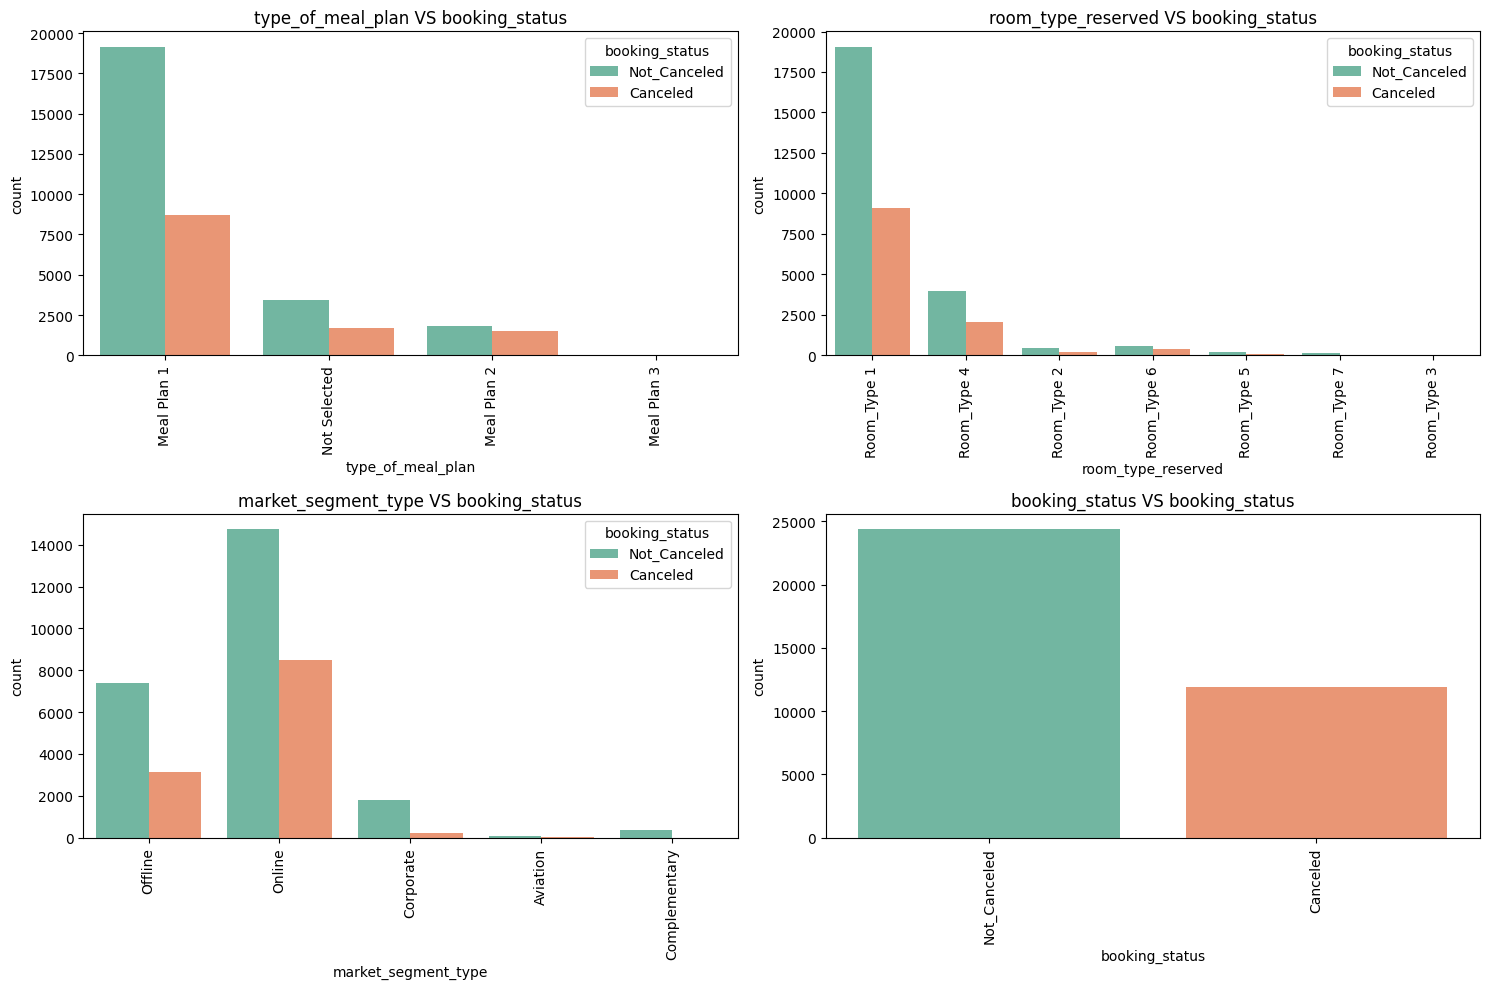

In [291]:
plot_bivaraite_cat(data , 'booking_status' , cat_cols)

### Data Processing

In [292]:
# print value counts for all categorical columns
for col in cat_cols:
    print(df[col].value_counts())
    print('-'*40)
   

type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64
----------------------------------------
room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64
----------------------------------------
market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64
----------------------------------------
booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64
----------------------------------------


In [293]:
label_encoder = LabelEncoder()

mappings={}

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

    mappings[col] = {label:code for label,code in zip(label_encoder.classes_ , label_encoder.transform(label_encoder.classes_))}
    

In [294]:
mappings

{'type_of_meal_plan': {'Meal Plan 1': 0,
  'Meal Plan 2': 1,
  'Meal Plan 3': 2,
  'Not Selected': 3},
 'room_type_reserved': {'Room_Type 1': 0,
  'Room_Type 2': 1,
  'Room_Type 3': 2,
  'Room_Type 4': 3,
  'Room_Type 5': 4,
  'Room_Type 6': 5,
  'Room_Type 7': 6},
 'market_segment_type': {'Aviation': 0,
  'Complementary': 1,
  'Corporate': 2,
  'Offline': 3,
  'Online': 4},
 'booking_status': {'Canceled': 0, 'Not_Canceled': 1}}

In [295]:
# check the data types
df.dtypes

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                         int32
required_car_parking_space                int64
room_type_reserved                        int32
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                       int32
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                            int32
dtype: object

In [296]:
df.shape

(36275, 18)

In [297]:
# check unique values in each column
df.nunique()

no_of_adults                               5
no_of_children                             6
no_of_weekend_nights                       8
no_of_week_nights                         18
type_of_meal_plan                          4
required_car_parking_space                 2
room_type_reserved                         7
lead_time                                352
arrival_year                               2
arrival_month                             12
arrival_date                              31
market_segment_type                        5
repeated_guest                             2
no_of_previous_cancellations               9
no_of_previous_bookings_not_canceled      59
avg_price_per_room                      3930
no_of_special_requests                     6
booking_status                             2
dtype: int64

In [298]:
# check the value counts for each column
for col in df.columns:
    print(df[col].value_counts())
    print('-'*40)

no_of_adults
2    26108
1     7695
3     2317
0      139
4       16
Name: count, dtype: int64
----------------------------------------
no_of_children
0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: count, dtype: int64
----------------------------------------
no_of_weekend_nights
0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: count, dtype: int64
----------------------------------------
no_of_week_nights
2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: count, dtype: int64
----------------------------------------
type_of_meal_plan
0    27835
3     5130
1     3305
2        5
Name: count, dtype: int64
----------------------------------------
required_car_parking_space
0    35151
1     1124
Name: count, dtype: int64
------------------------------

In [299]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [300]:
X = add_constant(df)

vif_data = pd.DataFrame()

vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

In [301]:
vif_data

,feature,VIF
0,const,3.593919e+07
1,no_of_adults,1.293487e+00
2,no_of_children,1.257270e+00
3,no_of_weekend_nights,1.064807e+00
4,no_of_week_nights,1.089508e+00
5,type_of_meal_plan,1.155803e+00
6,required_car_parking_space,1.033166e+00
7,room_type_reserved,1.532264e+00
8,lead_time,1.442987e+00
9,arrival_year,1.300423e+00


In [302]:
# # check multicollinearity using ivarience inflation factor
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# # create a new dataframe with all columns having numerical data types
# df_num = df.select_dtypes(include=np.number)

# # calculate ivarience inflation factor
# vif = pd.DataFrame()
# vif['Features'] = df_num.columns
# vif['VIF'] = [variance_inflation_factor(df_num.values, i) for i in range(df_num.shape[1])]

# vif



In [303]:
# #
# Features	VIF
# 0	no_of_adults	17.633813
# 1	no_of_children	1.341079
# 2	no_of_weekend_nights	1.985280
# 3	no_of_week_nights	3.748876
# 4	type_of_meal_plan	1.418933
# 5	required_car_parking_space	1.066165
# 6	room_type_reserved	1.919353
# 7	lead_time	2.755804
# 8	arrival_year	65.975421
# 9	arrival_month	7.212368
# 10	arrival_date	4.207091
# 11	market_segment_type	44.922107
# 12	repeated_guest	1.697690
# 13	no_of_previous_cancellations	1.347592
# 14	no_of_previous_bookings_not_canceled	1.612381
# 15	avg_price_per_room	15.858743
# 16	no_of_special_requests	2.125313
# 17	booking_status	4.446239


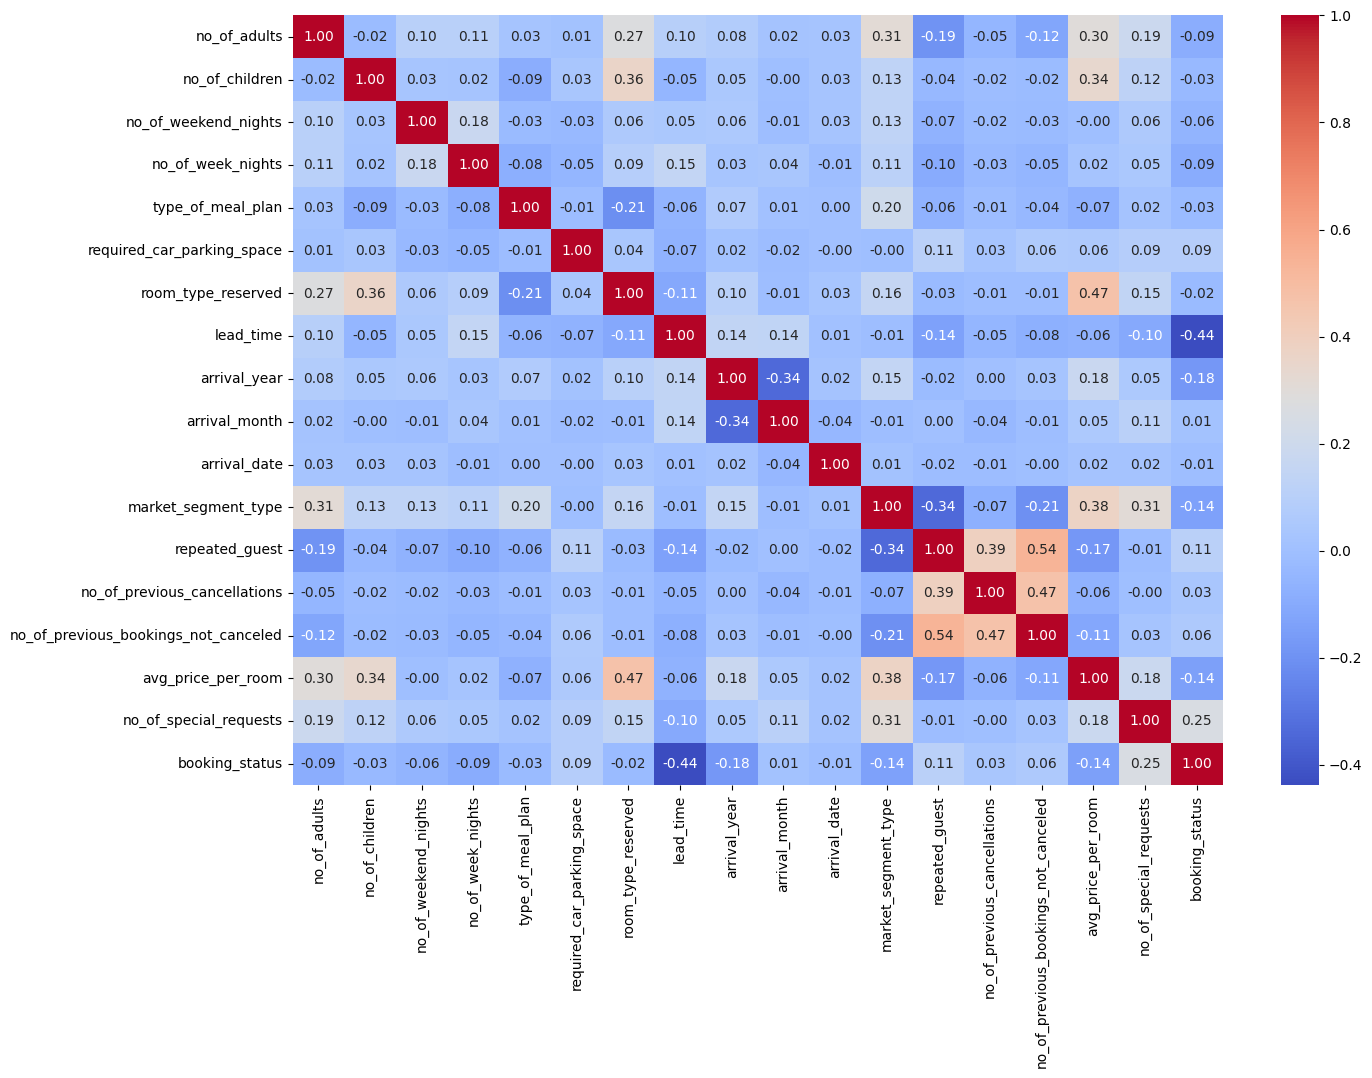

In [304]:
# correlation matrix using heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [305]:
# calculate skewness for all numerical columns
skew = df.skew()
skew

no_of_adults                            -0.333295
no_of_children                           4.710350
no_of_weekend_nights                     0.737616
no_of_week_nights                        1.599350
type_of_meal_plan                        1.801398
required_car_parking_space               5.413643
room_type_reserved                       1.729018
lead_time                                1.292492
arrival_year                            -1.669695
arrival_month                           -0.348229
arrival_date                             0.028809
market_segment_type                     -1.684871
repeated_guest                           6.002888
no_of_previous_cancellations            25.199876
no_of_previous_bookings_not_canceled    19.250191
avg_price_per_room                       0.667133
no_of_special_requests                   1.145081
booking_status                          -0.734507
dtype: float64

In [306]:
# apply log transformation to the skewed columns
for col in df.columns:
    if df[col].skew() > 5:
        df[col] = np.log1p(df[col])

In [307]:
# calculate skewness for all numerical columns
skew = df.skew()
skew

no_of_adults                            -0.333295
no_of_children                           4.710350
no_of_weekend_nights                     0.737616
no_of_week_nights                        1.599350
type_of_meal_plan                        1.801398
required_car_parking_space               5.413643
room_type_reserved                       1.729018
lead_time                                1.292492
arrival_year                            -1.669695
arrival_month                           -0.348229
arrival_date                             0.028809
market_segment_type                     -1.684871
repeated_guest                           6.002888
no_of_previous_cancellations            14.568081
no_of_previous_bookings_not_canceled     8.921569
avg_price_per_room                       0.667133
no_of_special_requests                   1.145081
booking_status                          -0.734507
dtype: float64

In [308]:
# value counts for the target column
df['booking_status'].value_counts()

booking_status
1    24390
0    11885
Name: count, dtype: int64

In [309]:
# separate the input and target columns
X = df.drop('booking_status', axis=1)
y = df['booking_status']

In [310]:
# apply the SMOTE technique to balance the data
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

c:\Users\fahee\miniconda3\envs\myenv\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [311]:
# value counts for the target column after applying SMOTE
y_resampled.value_counts()

booking_status
1    24390
0    24390
Name: count, dtype: int64

In [312]:
balanced_df = pd.concat([X_resampled, y_resampled], axis=1)

In [313]:
balanced_df.shape

(48780, 18)

In [314]:
df = balanced_df.copy()

In [315]:
df.shape

(48780, 18)

In [316]:
X = df.drop('booking_status', axis=1)
y = df['booking_status']

In [317]:
# feature selection using random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

RandomForestClassifier(random_state=42)

In [318]:
rf.feature_importances_

array([0.0217589 , 0.00551998, 0.0323021 , 0.04519836, 0.01984609,
       0.00831173, 0.01585656, 0.30660052, 0.02357682, 0.08652501,
       0.08289803, 0.05767605, 0.00502683, 0.00056497, 0.00227692,
       0.1462176 , 0.13984355])

In [319]:
# feature importance dataframe
feature_importance = pd.DataFrame() 
feature_importance['feature'] = X.columns  
feature_importance['importance'] = rf.feature_importances_
feature_importance = feature_importance.sort_values(by='importance', ascending=False)
feature_importance

,feature,importance
7,lead_time,0.306601
15,avg_price_per_room,0.146218
16,no_of_special_requests,0.139844
9,arrival_month,0.086525
10,arrival_date,0.082898
11,market_segment_type,0.057676
3,no_of_week_nights,0.045198
2,no_of_weekend_nights,0.032302
8,arrival_year,0.023577
0,no_of_adults,0.021759


In [320]:
# select top 10 features
selected_features = feature_importance['feature'][:10].tolist()
selected_features

['lead_time',
 'avg_price_per_room',
 'no_of_special_requests',
 'arrival_month',
 'arrival_date',
 'market_segment_type',
 'no_of_week_nights',
 'no_of_weekend_nights',
 'arrival_year',
 'no_of_adults']

In [321]:
# create a new dataframe with the selected features in df
top_10_df = df[selected_features + ['booking_status']]
top_10_df.shape

(48780, 11)

In [322]:
df = top_10_df.copy()

In [324]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [325]:
X = df.drop(columns='booking_status')
y = df["booking_status"]

In [326]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=42)

In [ ]:
classifiers = {
    "Random Forest" : RandomForestClassifier(random_state=42),
    "LogisticRegression" : LogisticRegression(random_state=42),
    "Gradient Boosting" : GradientBoostingClassifier(random_state=42),
    "Suuport vector classifier" : SVC(random_state=42),
    "Decsion Tree" : DecisionTreeClassifier(random_state=42),
    "KNN" : KNeighborsClassifier(),
    "Naive Bayes" : GaussianNB(),
    "XGboost" : XGBClassifier(random_state=42),
    "Adaboost" : AdaBoostClassifier(random_state=42),
    "LGBM" : LGBMClassifier(random_state=42) 
}

# get list of models to be trained in comma separeted for just remembering 
models = [RandomForestClassifier,LogisticRegression,GradientBoostingClassifier,SVC,DecisionTreeClassifier,KNeighborsClassifier,GaussianNB,XGBClassifier,AdaBoostClassifier,LGBMClassifier]


In [328]:
metrics = {
    "Model" : [],
    "Accuracy" : [],
    "Precision" : [],
    "Recall" : [],
    "F1 Score" : []
}

In [329]:
for model_name,classifier in classifiers.items():
    classifier.fit(X_train,y_train)

    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)

    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 Score"].append(f1)


c:\Users\fahee\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Info] Number of positive: 19518, number of negative: 19506
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001538 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 584
[LightGBM] [Info] Number of data points in the train set: 39024, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500154 -> initscore=0.000615
[LightGBM] [Info] Start training from score 0.000615


In [330]:
metrics_df= pd.DataFrame(metrics)
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.918102,0.910171,0.927545,0.918776
1,LogisticRegression,0.787515,0.785904,0.789614,0.787755
2,Gradient Boosting,0.835691,0.830135,0.843596,0.836812
3,Suuport vector classifier,0.686859,0.654376,0.790435,0.715999
4,Decsion Tree,0.885199,0.892962,0.875000,0.883890
5,KNN,0.830361,0.856889,0.792693,0.823542
6,Naive Bayes,0.755740,0.772260,0.724548,0.747644
7,XGboost,0.896064,0.885800,0.909072,0.897285
8,Adaboost,0.776855,0.763132,0.802135,0.782148
9,LGBM,0.884174,0.867728,0.906199,0.886546


In [331]:
# train our best model which is Random Forest

In [332]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [333]:
X = df.drop(columns='booking_status')
y = df["booking_status"]

In [334]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=42)

In [335]:
rf = RandomForestClassifier(random_state=42)

In [336]:
params_dist={
    'n_estimators' : randint(100,500),
    'max_depth' : randint(10,50),
    'min_samples_split': randint(2,10),
    'min_samples_leaf' : randint(1,5),
    'bootstrap' : [True , False] 
}

In [337]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=params_dist,
    n_iter=5,
    cv=5,
    verbose=2,
    random_state=42,
    scoring='accuracy'
)

In [338]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   8.5s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   6.3s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   6.2s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   5.9s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   6.3s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=  11.3s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=  12.2s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=  13.3s
[CV]

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000020727863D30>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000207266A6EE0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000207339A8190>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002072ED39A30>},
                   random_state=42, scoring='accuracy', verbose=2)

In [339]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 33,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 408}